## RocketVsCarrots - Image Classification
https://www.kaggle.com/datasets/mikoajfish99/carrots-vs-rockets-image-classification



### About Dataset
The "Carrots vs Rockets - Image Classification" dataset is a collection of images downloaded from various sources, containing photographs of both carrots and rockets. This dataset has been compiled for the purpose of training and evaluating image classification algorithms.

The dataset contains a total of 306 images. The images have been labeled as either "carrot" or "rocket" and are stored in separate directories.

This dataset can be used for a variety of tasks related to image classification, including developing and testing deep learning algorithms, evaluating the effectiveness of different image features and classification techniques, and comparing the performance of different models.

Researchers and practitioners interested in using this dataset are encouraged to cite the original sources of the images and to acknowledge any modifications made to the dataset for their particular use. The dataset may be useful for tasks such as automated vegetable sorting or satellite image analysis.

python versie: 3.10

Stap 1 check de dataset op rare fotos.
Stap 2 Split de data in verschillende mappen (Train en Validation)
Stap 3 Train de model
Stap 4 Test de model

### Model DNN

Dit model is een DNN (Deep Neural Network). Het bevat een opeenvolging van lagen, waaronder een invoerlaag, een volledig verbonden (dense) laag met 256 neuronen en een softmax-activatiefunctie, en een uitvoerlaag met het aantal klassen (2 in dit geval) en een softmax-activatiefunctie.

Hoewel het model gebruikmaakt van afbeeldingsgegevens, bevat het geen specifieke convolutielagen die kenmerkextractie uit de afbeeldingen uitvoeren. Hierdoor is het geen typisch CNN (Convolutional Neural Network). In plaats daarvan wordt de afbeeldingsinformatie geflattened naar een 1D-vorm voordat het door de dense lagen gaat. Dit type model kan worden gebruikt voor eenvoudige beeldclassificatietaken, maar kan minder geschikt zijn voor complexe visuele patronen die convolutielagen beter kunnen vastleggen.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data directories
train_dir = '../datasets/CarrortsVsRockets/train'
validation_dir = '../datasets/CarrortsVsRockets/val'

# Define the batch size
batch_size = 32

# Define the image size
img_size = (224, 224)

# Define the number of classes
num_classes = 2

# Define the data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical')

# Define the model architecture
model = keras.Sequential([
    layers.Flatten(input_shape=(img_size[0], img_size[1], 3)),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/batch_size)



Found 264 images belonging to 2 classes.
Found 42 images belonging to 2 classes.
Epoch 1/10


2023-06-11 09:49:38.696242: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


8/8 [==============================] - 4s 429ms/step - loss: 106.2675 - accuracy: 0.5227 - val_loss: 52.7715 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 3s 357ms/step - loss: 15.3021 - accuracy: 0.7348 - val_loss: 6.9445 - val_accuracy: 0.8333
Epoch 3/10
8/8 [==============================] - 3s 354ms/step - loss: 4.6099 - accuracy: 0.8750 - val_loss: 7.1468 - val_accuracy: 0.8333
Epoch 4/10
8/8 [==============================] - 3s 380ms/step - loss: 4.0254 - accuracy: 0.9015 - val_loss: 7.8019 - val_accuracy: 0.8810
Epoch 5/10
8/8 [==============================] - 3s 351ms/step - loss: 2.6793 - accuracy: 0.9129 - val_loss: 11.4749 - val_accuracy: 0.8333
Epoch 6/10
8/8 [==============================] - 3s 350ms/step - loss: 3.0162 - accuracy: 0.8977 - val_loss: 12.8677 - val_accuracy: 0.8333
Epoch 7/10
8/8 [==============================] - 3s 356ms/step - loss: 2.3322 - accuracy: 0.9167 - val_loss: 6.3991 - val_accuracy: 0.8571
Epoch 8/10
8/8 [=========

### Uitleg code

#### Batchsize
Keuze batchsize is 32. Dit is de standaard batch size.
Een kleinere batchgrootte kan leiden tot snellere optimalisatie en minder geheugenverbruik, maar het kan ook meer ruis in de gradiëntupdates introduceren. Een grotere batchgrootte kan leiden tot meer stabiele updates, maar kan meer geheugen vereisen en de trainingstijd per epoch verhogen.

#### Imagesize Defining the Model Architecture
Model Architecture
Hier definiëren we de architectuur van ons model. We gebruiken een sequentieel model met een Flatten-laag, gevolgd door een dichte laag met 256 neuronen en een ReLU-activeringsfunctie. Ten slotte gebruiken we nog een dichte laag met het aantal neuronen dat gelijk is aan het aantal klassen in onze dataset, en een softmax-activeringsfunctie.


Waarom ReLU, vanishing gradient te vookromen en snellere optimalisatie.
Waarom Softmax, zet de output om in een kansverdeling


Uitleg:
   - De ReLU (Rectified Linear Unit) is een veelgebruikte activatiefunctie in deep learning modellen omdat deze eenvoudig te berekenen is en goed werkt in veel verschillende toepassingen. De ReLU-functie geeft 0 terug voor alle negatieve inputwaarden en de inputwaarde zelf voor alle positieve inputwaarden. Dit zorgt voor een niet-lineaire transformatie van de inputgegevens en introduceert niet-lineariteit in het model.
   - De Softmax functie wordt vaak gebruikt in de uitvoerlaag van een neuraal netwerk, wanneer de uitvoer van het netwerk moet worden geïnterpreteerd als kansverdeling over de verschillende klassen. De softmax functie neemt als input een vector van willekeurige waarden en produceert als output een vector van waarden tussen 0 en 1 die de kans vertegenwoordigen dat de input tot elke klasse behoort. De softmax functie zorgt ervoor dat de uitvoer van het model goed geïnterpreteerd kan worden als een kansverdeling over de verschillende klassen.
   - De input_shape parameter geeft de vorm van de inputgegevens aan die het model verwacht. In het gegeven model is img_size een tuple die de hoogte en breedte van de inputafbeeldingen in pixels aangeeft en 3 geeft het aantal kleurkanalen aan (rood, groen, blauw). De Flatten laag van het model verwacht dus een input van img_size grootte met 3 kleurkanalen en vormt deze om tot een 1D vector, die vervolgens wordt doorgegeven aan de volgende lagen van het model.

#### ImageDataGenerator
De rescale wordt gebruikt om de pixelwaarden in de factor (1/255) te schalen

### Model compile
 - loss hiermee probeer ik het model te minimaliseren zodat we het niet overfitten. Ik gebruik categorical_crossentropy, omdat het een classificatie is met meerdere klassen



### Bij het trainen zie ik dat het model wel een goeie accuracy heeft.

In [2]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Get the predictions for the validation set
predictions = model.predict(validation_generator)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes
true_classes = validation_generator.classes

# Get the class labels
class_labels = list(validation_generator.class_indices.keys())

# Get the filenames of the validation set
filenames = validation_generator.filenames

# Get the indices of the misclassified images
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Calculate the accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

# Print the number of misclassified images
print('Number of misclassified images: ', len(misclassified_indices))
print('Accuracy: ', accuracy)

2/2 [==============================] - 0s 62ms/step
Number of misclassified images:  21
Accuracy:  0.5


### Analyse VAL

De nauwkeurigheid op de validatieset is niet geweldig. 0,45 is echt slecht. Dit kan het gevolg zijn van overfitting van het model. Of de dataset is te klein

### Oplossen?

- We kunnen data augmentation gebruiken
- Regularization bv: dropout en L2 regularization
- Vroeg stoppen met trainen wanneer bij de epoch het model niet meer vooruit gaat in accuracy. (Om overfitting te voorkomen)
- Dataset vergroten

### Inzien welke fotos het model verkeerd voorspelt


2/2 [==============================] - 0s 79ms/step
Accuracy:  0.4523809523809524
Number of misclassified images:  23


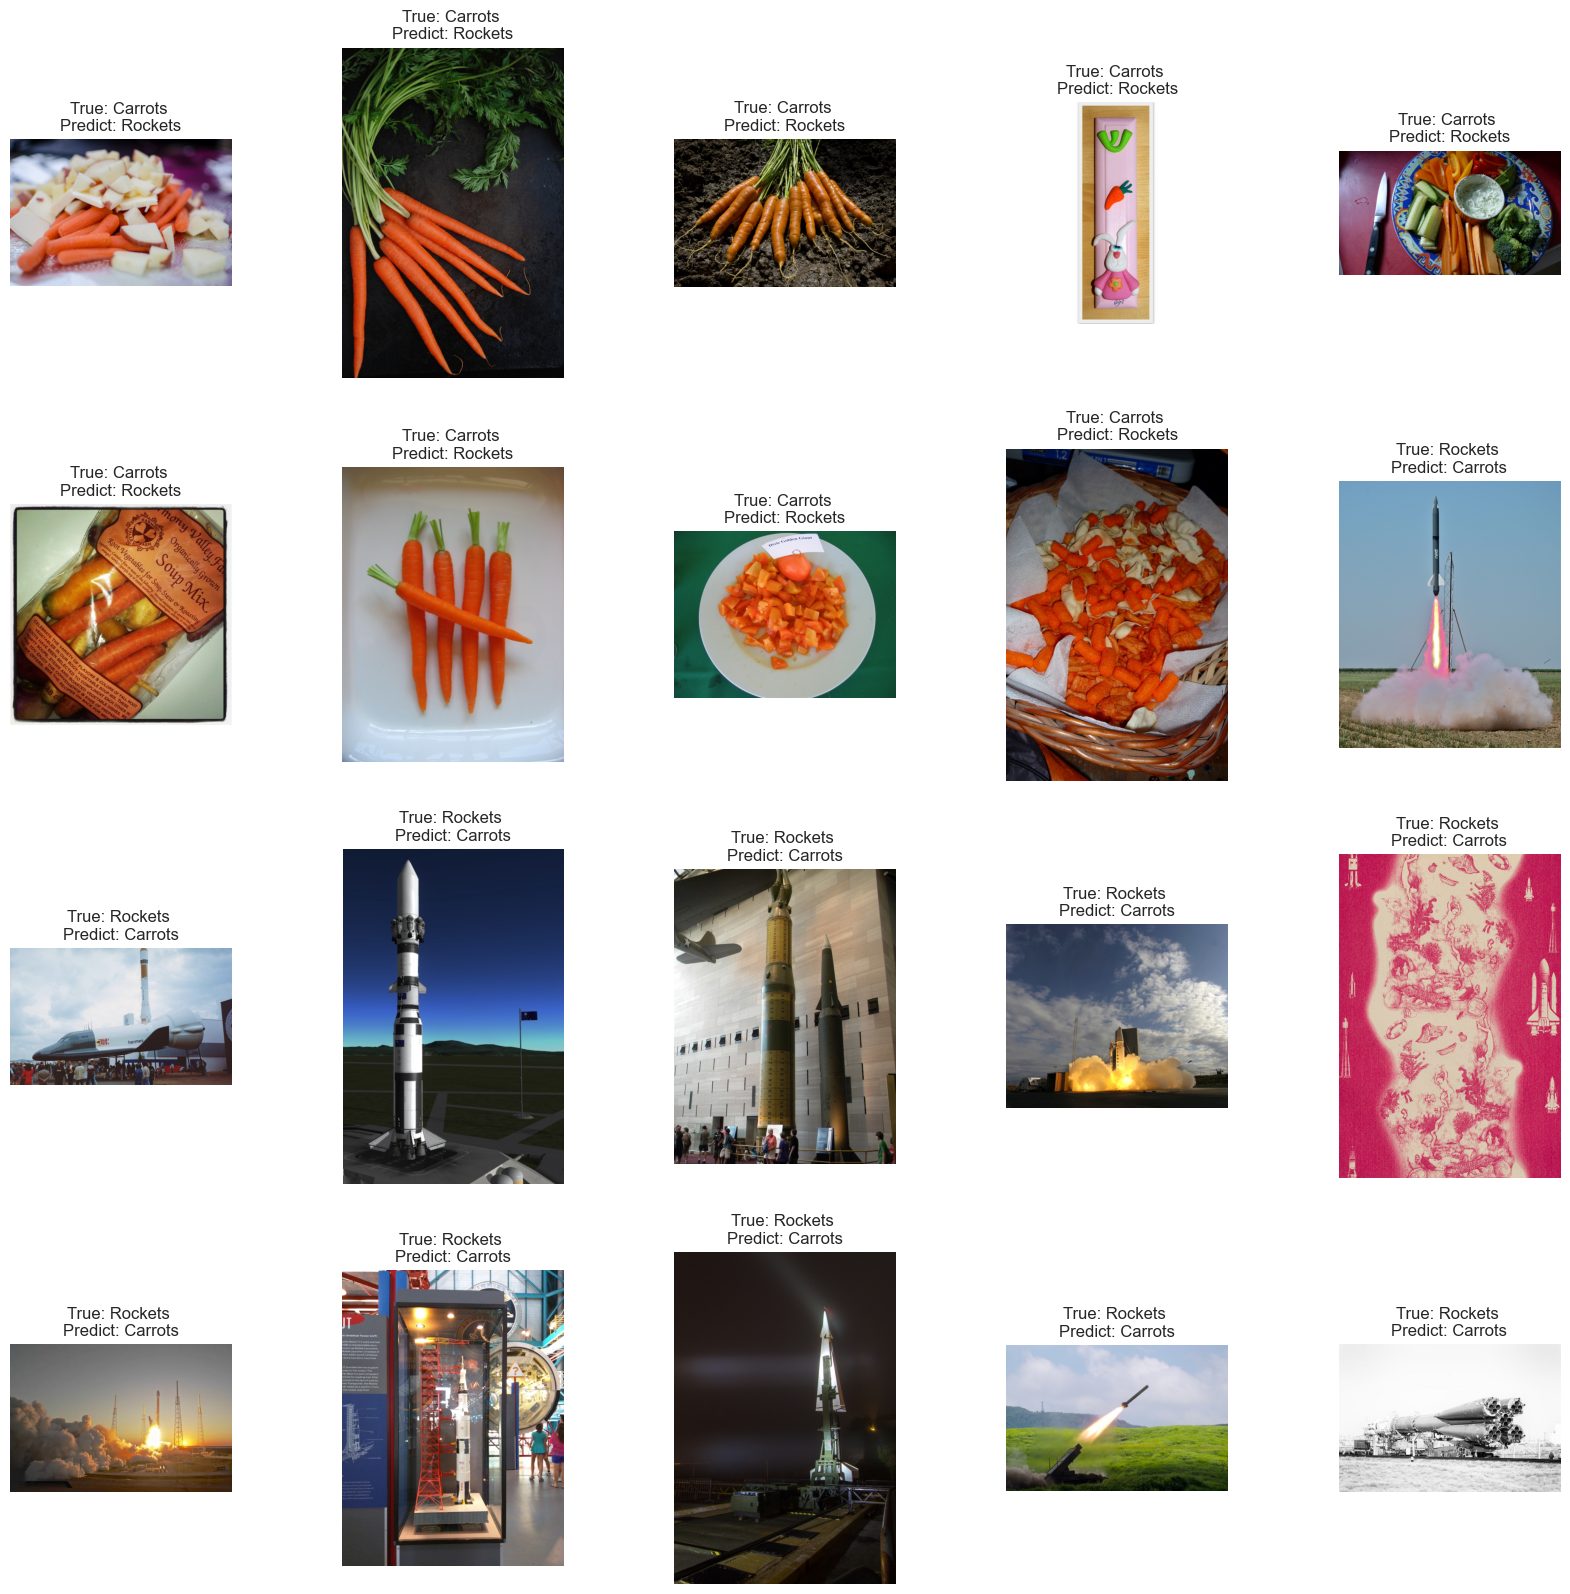

In [3]:
from sklearn.metrics import accuracy_score
import os
import numpy as np
import matplotlib.pyplot as plt

# Get the predictions for the validation set
predictions = model.predict(validation_generator)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes
true_classes = validation_generator.classes

# Get the class labels
class_labels = list(validation_generator.class_indices.keys())

# Get the filenames of the validation set
filenames = validation_generator.filenames

# Get the indices of the misclassified images
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Calculate the accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print('Accuracy: ', accuracy)

# Print the number of misclassified images
print('Number of misclassified images: ', len(misclassified_indices))

# Plot the misclassified images
fig, axes = plt.subplots(4, 5, figsize=(20, 20))
axes = axes.ravel()

for i in np.arange(0, 20):
    index = misclassified_indices[i]
    img_path = os.path.join(validation_dir, filenames[index])
    img = plt.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title("True: %s \nPredict: %s" % (class_labels[true_classes[index]],
                                                  class_labels[predicted_classes[index]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()


### Er zitten een paar fotos tussen die we zouden kunnen beschouwen als outliers, omdat het niet duidelijke fotos zijn van een raket of een wortel. Dit kan opgelost worden door de dataset op te schonen en kijken of er geen fouten fotos in zitten.

## Data augmentation
Laten we data augmentation proberen en kijken of we het overfitten kunnen verminderen
We verminderen ook het aantal epochs in de training.

### Model DNN

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data directories
train_dir = '../datasets/CarrortsVsRockets/train'
validation_dir = '../datasets/CarrortsVsRockets/val'

# Define the batch size
batch_size = 32

# Define the image size
img_size = (224, 224)

# Define the number of classes
num_classes = 2

# Define the data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10, # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
    horizontal_flip=True, # randomly flip images horizontally
    vertical_flip=False # don't randomly flip images vertically
)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical')

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10, # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
    horizontal_flip=True, # randomly flip images horizontally
    vertical_flip=False # don't randomly flip images vertically
)
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical')

# Define the model architecture
model = keras.Sequential([
    layers.Flatten(input_shape=(img_size[0], img_size[1], 3)),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/batch_size,
      epochs=4,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/batch_size)




Found 264 images belonging to 2 classes.
Found 42 images belonging to 2 classes.
Epoch 1/4
8/8 [==============================] - 5s 591ms/step - loss: 66.4907 - accuracy: 0.5644 - val_loss: 101.4312 - val_accuracy: 0.4286
Epoch 2/4
8/8 [==============================] - 4s 527ms/step - loss: 36.6177 - accuracy: 0.7121 - val_loss: 30.0086 - val_accuracy: 0.6667
Epoch 3/4
8/8 [==============================] - 4s 532ms/step - loss: 20.3869 - accuracy: 0.7803 - val_loss: 29.9372 - val_accuracy: 0.6905
Epoch 4/4
8/8 [==============================] - 4s 545ms/step - loss: 16.9766 - accuracy: 0.8030 - val_loss: 9.1466 - val_accuracy: 0.9286


#### ImageDataGenerator
Gebruik ik voor augmentatie van de data. Beeldtransformaties zoals: rotatie, verschuiving, spiegeling, afschuining, zoom. (Om meer diversiteit in de data te krijgen.)
De flow_from_directory genereert een batch data uit een directory met subdirectories van afbeeldingen gesorteerd op klasse en past de augmentatie toe op de genereerde data.

In [15]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Get the predictions for the validation set
predictions = model.predict(validation_generator)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes
true_classes = validation_generator.classes

# Get the class labels
class_labels = list(validation_generator.class_indices.keys())

# Get the filenames of the validation set
filenames = validation_generator.filenames

# Get the indices of the misclassified images
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Calculate the accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

# Print the number of misclassified images
print('Number of misclassified images: ', len(misclassified_indices))
print('Accuracy: ', accuracy)

2/2 [==============================] - 7s 2s/step
Number of misclassified images:  21
Accuracy:  0.5


### Accuracy op validation set
0.5 er is geen vooruitgang na data Augmentatie.

### Model CNN

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data directories
train_dir = '../datasets/CarrortsVsRockets/train'
validation_dir = '../datasets/CarrortsVsRockets/val'

# Define the batch size
batch_size = 32

# Define the image size
img_size = (224, 224)

# Define the number of classes
num_classes = 2

# Define the data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10, # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
    horizontal_flip=True, # randomly flip images horizontally
    vertical_flip=False, # don't randomly flip images vertically
)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical')

# Duplicate the images in the training set
train_images, train_labels = train_generator.next()
train_size = train_generator.samples
while train_generator.total_batches_seen < 2*train_size // batch_size:
    batch = train_generator.next()
    train_images = tf.concat([train_images, batch[0]], axis=0)
    train_labels = tf.concat([train_labels, batch[1]], axis=0)
train_generator = tf.keras.preprocessing.image.DirectoryIterator(
    train_dir,
    train_datagen,
    batch_size=batch_size,
    shuffle=True,
    seed=42,
)

# Define the model architecture
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(
      train_generator,
      steps_per_epoch=train_size//batch_size*2,
      epochs=3,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/batch_size,
      shuffle=False # don't shuffle the images (to allow for image duplication)
)


Found 264 images belonging to 2 classes.
Found 42 images belonging to 2 classes.
Found 264 images belonging to 2 classes.
Epoch 1/3
16/16 [==============================] - 11s 609ms/step - loss: 0.5644 - accuracy: 0.7121 - val_loss: 0.6760 - val_accuracy: 0.7143


Er gaat hier iets mis met de data augmentation. Ik heb al geprobeerd met de repeat() function. Helaas lost dit het niet op.

### Model CNN

Het onderstaande model is een CNN (Convolutional Neural Network). Het maakt gebruik van convolutielagen (Conv2D) en max pooling-lagen (MaxPooling2D) om kenmerkextractie uit de afbeeldingen uit te voeren. Deze lagen zijn specifiek ontworpen om ruimtelijke patronen in de afbeeldingen te detecteren.

Het model bevat ook een GlobalAveragePooling2D-laag, die het ruimtelijke kenmerkvolume verkleint tot een vaste dimensie, gevolgd door dense lagen (Dense) met relu-activaties en een dropout-laag (Dropout) om overfitting te verminderen. De laatste dense laag heeft softmax-activatie en geeft de classificatie-uitvoer voor de verschillende klassen.

De data-generators worden ook aangepast om gegevensaugmentatie toe te passen, zoals het roteren, verschuiven en spiegelen van de afbeeldingen. Dit helpt het model om robuuster te worden en beter te generaliseren naar nieuwe, niet-geziene gegevens.

Dit model is een CNN met convolutielagen voor kenmerkextractie, gevolgd door een DNN voor classificatie.

In [7]:
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the data directories
train_dir = '../datasets/CarrortsVsRockets/train'
validation_dir = '../datasets/CarrortsVsRockets/val'

# Define the batch size
batch_size = 32

# Define the image size
img_size = (224, 224)

# Define the number of classes
num_classes = 2

# Define the data generators
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=10, # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
    horizontal_flip=True, # randomly flip images horizontally
    vertical_flip=False, # don't randomly flip images vertically
)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical')

validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical')

# Define the model architecture
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Define callbacks
checkpoint_callback = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
epochs = 10
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[checkpoint_callback, early_stopping_callback]
)

# Evaluate the model on the test set
test_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

# Load the best saved model
best_model = keras.models.load_model("best_model.h5")

# Evaluate the best model on the test set
test_loss, test_acc = best_model.evaluate(test_generator)

# Print the test accuracy
print("Test accuracy:", test_acc)


Found 264 images belonging to 2 classes.
Found 42 images belonging to 2 classes.
Epoch 1/10
9/9 [==============================] - 10s 1s/step - loss: 0.5750 - accuracy: 0.7159 - val_loss: 0.4785 - val_accuracy: 0.7857
Epoch 2/10
9/9 [==============================] - 9s 983ms/step - loss: 0.4729 - accuracy: 0.7992 - val_loss: 0.4625 - val_accuracy: 0.8095
Epoch 3/10
9/9 [==============================] - 9s 946ms/step - loss: 0.4141 - accuracy: 0.8258 - val_loss: 0.4047 - val_accuracy: 0.8571
Epoch 4/10
9/9 [==============================] - 9s 947ms/step - loss: 0.3584 - accuracy: 0.8447 - val_loss: 0.3855 - val_accuracy: 0.8810
Epoch 5/10
9/9 [==============================] - 10s 1s/step - loss: 0.3132 - accuracy: 0.8750 - val_loss: 0.4016 - val_accuracy: 0.8333
Epoch 6/10
9/9 [==============================] - 10s 1s/step - loss: 0.2975 - accuracy: 0.8788 - val_loss: 0.5702 - val_accuracy: 0.8095
Epoch 7/10
9/9 [==============================] - 10s 1s/step - loss: 0.2892 - accura

#### Model architectuur:
-   Convo2D-lagen: Ze hebben een toenemende filtergrootte. Herkennen van abstractere kenmerken. Eigenlijk het herkennen en leren van de belangrijkste kenmerken van de afbeeldingen.
-   MaxPooling-lagen: Het verminderd de dimensies van de gegevens. (Maar probeert de belangrijkste dingen te behouden) Het aantal parameters wordt hierdoor verminderd in de hoop om overfitting te voorkomen.
-   GlobalAveragePooling2D: Geeft gemiddelde van alle outputs van de lagen daarvoor.

#### Callbacks:
-   Modelcheckpoint: is een callback function die de weights na elke epoch opslaat.(Alleen als de val accuratie verbeterd is). Bestanden worden opgeslagen in bestand genaamd "best_model.h5".
-   EarlyStopping: is een andere callback functie. Deze stopt het trainen als de val accuracy niet verbeterd na een aantal epochs. (na 3 epochs, want patience=3)

### Autoencoder met CNN architectuur

In dit stukje code wordt een convolutionele auto-encoder gebruikt. De encoder-lagen nemen de invoerafbeeldingen en voeren verschillende convolutie- en pooling-operaties uit om de dimensies te verkleinen en de belangrijkste kenmerken van de afbeeldingen te extraheren. De gecodeerde representatie wordt vervolgens door de decoder-lagen geleid, die de gecomprimeerde representatie proberen te decoderen en de oorspronkelijke afbeeldingen te reconstrueren.

Naast de auto-encoder wordt er ook een classificatiemodel toegevoegd aan het einde van de encoder-laag. Deze klassificeert de gecodeerde representatie van de afbeeldingen in de gewenste klassen. Het gecombineerde model wordt getraind op de gegevens van de trainingsgenerator en geëvalueerd op de testgegevens.

Dus in dit geval wordt de auto-encoder gebruikt voor functie-extractie en de gecodeerde representatie wordt vervolgens doorgegeven aan het classificatiemodel voor classificatie.

In [8]:
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the data directories
train_dir = '../datasets/CarrortsVsRockets/train'
validation_dir = '../datasets/CarrortsVsRockets/val'

# Define the batch size
batch_size = 32

# Define the image size
img_size = (224, 224)

# Define the number of classes
num_classes = 2

# Define the data generators
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=10, # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
    horizontal_flip=True, # randomly flip images horizontally
    vertical_flip=False, # don't randomly flip images vertically
)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical')

validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical')

# Encoder
encoder_input = layers.Input(shape=(img_size[0], img_size[1], 3))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
encoded = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = keras.Model(encoder_input, decoded)

# Classifier model (using the encoder part as feature extraction)
encoder_output = encoded
x = layers.GlobalAveragePooling2D()(encoder_output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
classifier_output = layers.Dense(num_classes, activation='softmax')(x)

# Combined model (autoencoder + classifier)
combined_model = keras.Model(encoder_input, classifier_output)

# Compile the combined model
combined_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the combined model
combined_model.fit(  train_generator,
    validation_data=validation_generator,
    epochs=5)

# Evaluate the best model on the test set
test_loss, test_acc = combined_model.evaluate(test_generator)

# Print the test accuracy
print("Test accuracy:", test_acc)

Found 264 images belonging to 2 classes.
Found 42 images belonging to 2 classes.
Epoch 1/5
9/9 [==============================] - 9s 906ms/step - loss: 0.6951 - accuracy: 0.4848 - val_loss: 0.6765 - val_accuracy: 0.5714
Epoch 2/5
9/9 [==============================] - 8s 875ms/step - loss: 0.6113 - accuracy: 0.7045 - val_loss: 0.4731 - val_accuracy: 0.7619
Epoch 3/5
9/9 [==============================] - 8s 980ms/step - loss: 0.4365 - accuracy: 0.8030 - val_loss: 0.4540 - val_accuracy: 0.8095
Epoch 4/5
9/9 [==============================] - 8s 893ms/step - loss: 0.3677 - accuracy: 0.8485 - val_loss: 0.6603 - val_accuracy: 0.7619
Epoch 5/5
2/2 [==============================] - 1s 84ms/step - loss: 0.3975 - accuracy: 0.8571
Test accuracy: 0.8571428656578064


Encoder zorgt voor het verminderen van spatial dimensions tijdens het verhogen van het aantal filters. (In de convo2D lagen)
Decoder breid uit de dimensions en recovered de originele foto structuur, door het geleerde van de encoder te gebruiken.

In vergelijking met het normale CNN model is de accuracy omlaag gegaan. Een accu van 0.83 is niet verkeerd. Ik heb liever dit model want ik heb het gevoel dat het andere CNN model meer overfit dan dit model.

1/1 [==============================] - 0s 125ms/step


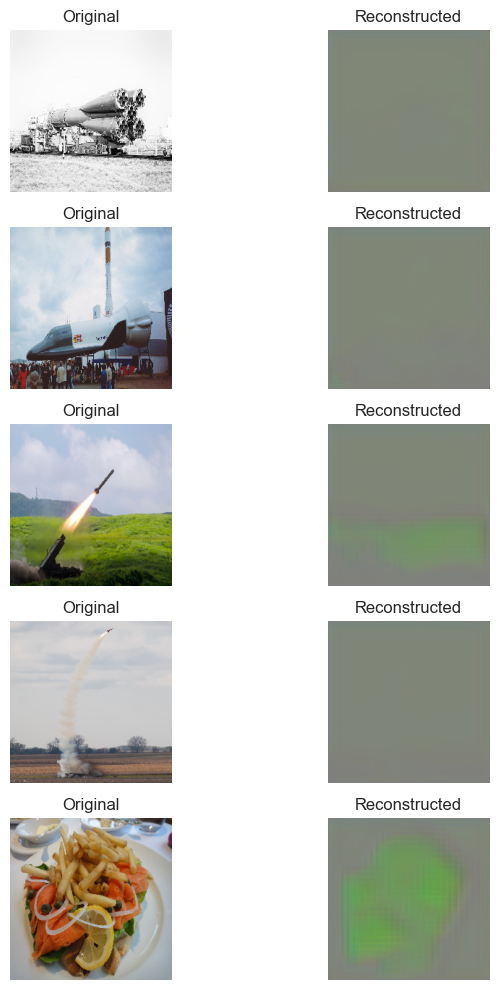

In [9]:
import matplotlib.pyplot as plt

# Select a few images from the validation set
num_images = 5
validation_images, _ = next(validation_generator)
validation_images = validation_images[:num_images]

# Generate reconstructed images using the autoencoder
reconstructed_images = autoencoder.predict(validation_images)

# Plot the original and reconstructed images
fig, axes = plt.subplots(num_images, 2, figsize=(8, 2*num_images))
for i in range(num_images):
    # Plot original image
    axes[i, 0].imshow(validation_images[i])
    axes[i, 0].axis('off')
    axes[i, 0].set_title('Original')

    # Plot reconstructed image
    axes[i, 1].imshow(reconstructed_images[i])
    axes[i, 1].axis('off')
    axes[i, 1].set_title('Reconstructed')

plt.tight_layout()
plt.show()


![autoEncoder](https://gitlab.fdmci.hva.nl/chintss/minor-logboek-aai-2/-/raw/main/deeplearning/Screenshot_2023-06-11_at_09.55.13.png)

Ik probeer de fotos met de autoencoder  model te generen. Maar het is helaas slecht zichtbaar. Dit kan betekenen dat het model maar weinig patronen herkent. Als je goed kijkt zie je dat hij de derde foto wel herkent en de laatste.

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data directories
train_dir = '../datasets/CarrortsVsRockets/train'
validation_dir = '../datasets/CarrortsVsRockets/val'

# Define the batch size
batch_size = 32

# Define the image size
img_size = (224, 224)

# Define the number of classes
num_classes = 2

# Define the data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical')

# Define the model architecture
inputs = keras.Input(shape=(img_size[0], img_size[1], 3))
x = layers.Conv2D(64, 3, activation='relu')(inputs)
x = layers.Conv2D(64, 3, activation='relu')(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_1_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_2_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation='relu')(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs, outputs)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/batch_size)


Found 264 images belonging to 2 classes.
Found 42 images belonging to 2 classes.
Epoch 1/10
8/8 [==============================] - 28s 4s/step - loss: 0.5730 - accuracy: 0.7008 - val_loss: 0.4876 - val_accuracy: 0.8095
Epoch 2/10
8/8 [==============================] - 27s 3s/step - loss: 0.4451 - accuracy: 0.8485 - val_loss: 0.4466 - val_accuracy: 0.8095
Epoch 3/10
8/8 [==============================] - 28s 3s/step - loss: 0.3478 - accuracy: 0.8523 - val_loss: 0.4480 - val_accuracy: 0.8810
Epoch 4/10
8/8 [==============================] - 30s 4s/step - loss: 0.3015 - accuracy: 0.8788 - val_loss: 0.4440 - val_accuracy: 0.8810
Epoch 5/10
8/8 [==============================] - 35s 4s/step - loss: 0.2599 - accuracy: 0.8939 - val_loss: 0.5840 - val_accuracy: 0.8333
Epoch 6/10
8/8 [==============================] - 30s 4s/step - loss: 0.2455 - accuracy: 0.9053 - val_loss: 0.5539 - val_accuracy: 0.8333
Epoch 7/10
8/8 [==============================] - 33s 4s/step - loss: 0.2338 - accuracy: 0.


modelarchitecture:
   1. Het begint met een Keras input laag, en volgt met een reeks aan convolutie lagen. Met de activatie functie Relu.
   2.  De MaxPooling2D-laag wordt gebruikt voor downsampling en het verminderen van de ruimtelijke dimensies. De add-functie wordt gebruikt voor het implementeren van residuale verbindingen.
   3. Add bij MaxPooling: Hiermee wordt de uitvoer van een convolutielaag (x) opgeteld bij de uitvoer van een eerdere laag (block_1_output). Dit stelt het model in staat om residuale kenmerken te leren en te gebruiken, waardoor de prestaties kunnen verbeteren.
   4. Na de laatste convolutie laag volgt, de GlobalAveragePooling2D-laag verkleint de ruimtelijke dimensies tot een enkele vector, waarbij belangrijke ruimtelijke informatie behouden blijft.
   5. Tot slot zijn er twee volledig verbonden (dense) lagen: layers.Dense(256, activation='relu') en layers.Dense(num_classes, activation='softmax'). De eerste dense laag heeft 256 neuronen met ReLU-activatie, en de laatste dense laag produceert de uiteindelijke klassenprobabiliteiten met behulp van de softmax-activatiefunctie.


Model is momenteel erg eenvoudig, we kunnen het complexer maken hiermee:

1. Toenemende complexiteit: Het toevoegen van meer convolutielagen. Je kunt extra lagen toevoegen met een hoger aantal filters, bijvoorbeeld 128 of 256, om het model in staat te stellen complexere kenmerken te leren.
2. Veranderen van de filtergrootte: Je kunt experimenteren met verschillende filtergroottes om te zien welke het beste werken voor jouw specifieke dataset. Bijvoorbeeld, naast 3x3 filters kun je ook 5x5 of zelfs 7x7 filters proberen. (7x7 filter geprobeerd duurt enorm lang...)
3. Toevoegen van extra pooling-lagen: Je kunt extra pooling-lagen toevoegen om de ruimtelijke dimensies verder te verkleinen en de hoeveelheid informatie in het model te verminderen. Bijvoorbeeld, na elke set van convolutielagen kun je een MaxPooling2D-laag toevoegen om de dimensies te halveren.

## Residual neural network

Ik denk dat ResNet modellen moeite gaat hebben met het classificeren. Want ze kijken naar de vorm, lijnen en textuur. Dit kan bij raketten en wortels soms overeenkomen.

In [11]:
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import certifi
import ssl
#om ssl-certificering te omzeilen
ssl._create_default_https_context = ssl._create_unverified_context

# Define the data directories
train_dir = '../datasets/CarrortsVsRockets/train'
validation_dir = '../datasets/CarrortsVsRockets/val'

# Define the batch size
batch_size = 32

# Define the image size
img_size = (224, 224)

# Define the number of classes
num_classes = 2

# Define the data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

# Load the ResNet50 model without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Add your own classifier layers on top
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256, activation='relu')(x)
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

# Create the ResNet model
model = keras.Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)



Found 264 images belonging to 2 classes.
Found 42 images belonging to 2 classes.
Epoch 1/10
8/8 [==============================] - 48s 5s/step - loss: 0.3701 - accuracy: 0.8707 - val_loss: 802.1724 - val_accuracy: 0.4375
Epoch 2/10
8/8 [==============================] - 40s 5s/step - loss: 0.3918 - accuracy: 0.9397 - val_loss: 11066.4492 - val_accuracy: 0.6250
Epoch 3/10
8/8 [==============================] - 41s 5s/step - loss: 0.2495 - accuracy: 0.9483 - val_loss: 2264.7354 - val_accuracy: 0.4688
Epoch 4/10
8/8 [==============================] - 41s 5s/step - loss: 0.5183 - accuracy: 0.8664 - val_loss: 26028.9453 - val_accuracy: 0.5625
Epoch 5/10
8/8 [==============================] - 44s 6s/step - loss: 0.2148 - accuracy: 0.9297 - val_loss: 251148.0781 - val_accuracy: 0.4375
Epoch 6/10
8/8 [==============================] - 40s 5s/step - loss: 0.1239 - accuracy: 0.9698 - val_loss: 394468.5000 - val_accuracy: 0.4375
Epoch 7/10
8/8 [==============================] - 45s 6s/step - loss

Laad het ResNet50-model zonder de top (volledig verbonden) lagen:

  ResNet50 wordt opgeroepen met de parameters weights='imagenet' om de vooraf getrainde gewichten van het model te laden, include_top=False om de top lagen (die specifiek zijn voor de ImageNet-classificatietaken) uit te sluiten, en input_shape om de verwachte afbeeldingsgrootte en het aantal kanalen (3 voor RGB) op te geven.

classificatielagen:

- De output van het geladen ResNet50-model wordt toegewezen aan de variabele x.
- GlobalAveragePooling2D wordt gebruikt om de ruimtelijke afmetingen van de feature maps te verminderen tot een vector.
- Dense wordt gebruikt om een dicht verbonden (fully connected) laag toe te voegen met 256 neuronen en de ReLU-activatiefunctie.
- De laatste dicht verbonden laag (outputs) heeft het aantal klassen als uitvoerknooppunten en maakt gebruik van de softmax-activatiefunctie om de classificatiekansen voor elke klasse te genereren.

Maak het ResNet-model:
- keras.Model wordt gebruikt om een nieuw model te maken met `base_model.input

#### Residual neural network Architecture

Wat een ResNet anders maakt is de aanwezigheid van skip-verbindingen.



In [12]:
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data directories
train_dir = '../datasets/CarrortsVsRockets/train'
validation_dir = '../datasets/CarrortsVsRockets/val'

# Define the batch size
batch_size = 32

# Define the image size
img_size = (224, 224)

# Define the number of classes
num_classes = 2

# Define the data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

# Load the ResNet50 model without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Add your own classifier layers on top
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256, activation='relu')(x)
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

# Create the ResNet model
model = keras.Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)


Found 264 images belonging to 2 classes.
Found 42 images belonging to 2 classes.
Epoch 1/10
8/8 [==============================] - 54s 6s/step - loss: 0.6894 - accuracy: 0.8438 - val_loss: 618.4547 - val_accuracy: 0.4375
Epoch 2/10
8/8 [==============================] - 43s 5s/step - loss: 0.1216 - accuracy: 0.9784 - val_loss: 17433.8164 - val_accuracy: 0.4062
Epoch 3/10
8/8 [==============================] - 44s 5s/step - loss: 0.2604 - accuracy: 0.9569 - val_loss: 6123.2876 - val_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 46s 6s/step - loss: 0.2351 - accuracy: 0.9310 - val_loss: 14406594.0000 - val_accuracy: 0.4062
Epoch 5/10
8/8 [==============================] - 47s 6s/step - loss: 0.2275 - accuracy: 0.9526 - val_loss: 13044117.0000 - val_accuracy: 0.4688
Epoch 6/10
8/8 [==============================] - 48s 6s/step - loss: 0.1333 - accuracy: 0.9569 - val_loss: 1126025.0000 - val_accuracy: 0.4062
Epoch 7/10
8/8 [==============================] - 50s 6s/step 

Resnet is niet goed op deze

## Transfer Learning

 Transfer learning is een techniek waarbij een vooraf getraind model wordt gebruikt als basis en vervolgens worden aangepaste lagen toegevoegd voor een specifieke taak. In dit geval wordt het vooraf getrainde ResNet50-model gebruikt als basis en worden er aangepaste lagen toegevoegd voor classificatie van afbeeldingen. Door het gebruik van het vooraf getrainde model profiteert het model van de gewenste functies die het ResNet50-model al heeft geleerd op grote datasets zoals ImageNet. Vervolgens worden de aangepaste lagen getraind op de specifieke taak van classificatie van wortels en raketten. Dit maakt het mogelijk om met minder geannoteerde gegevens en minder rekenkracht goede prestaties te behalen.

### Pre trained ResNet

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score

# Set the paths for train and validation directories
train_dir = '../datasets/CarrortsVsRockets/train'
validation_dir = '../datasets/CarrortsVsRockets/val'

# Define the batch size
batch_size = 32

# Define the image size
img_size = (224, 224)

# Define the number of classes
num_classes = 2

# Data augmentation for train set
train_datagen = ImageDataGenerator(rescale=1./255)

# Data augmentation for validation set (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the train set
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# Load and preprocess the validation set
validation_generator = val_datagen.flow_from_directory(validation_dir,
                                                       target_size=img_size,
                                                       batch_size=batch_size,
                                                       class_mode='categorical')

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Add custom layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_generator,
          steps_per_epoch=train_generator.samples // batch_size,
          validation_data=validation_generator,
          validation_steps=validation_generator.samples // batch_size,
          epochs=10)

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")

# Make predictions on the validation set
val_predictions = model.predict(validation_generator)
val_pred_labels = tf.argmax(val_predictions, axis=1).numpy()

# Get true labels of the validation set
val_true_labels = validation_generator.classes

# Calculate accuracy score
accuracy = accuracy_score(val_true_labels, val_pred_labels)
print(f"Accuracy Score: {accuracy}")


Found 264 images belonging to 2 classes.
Found 42 images belonging to 2 classes.
Epoch 1/10
8/8 [==============================] - 19s 2s/step - loss: 0.8725 - accuracy: 0.5560 - val_loss: 0.5849 - val_accuracy: 0.5625
Epoch 2/10
8/8 [==============================] - 16s 2s/step - loss: 0.6518 - accuracy: 0.6379 - val_loss: 0.5235 - val_accuracy: 0.8125
Epoch 3/10
8/8 [==============================] - 16s 2s/step - loss: 0.6016 - accuracy: 0.6897 - val_loss: 0.4964 - val_accuracy: 0.7812
Epoch 4/10
8/8 [==============================] - 19s 2s/step - loss: 0.5442 - accuracy: 0.7734 - val_loss: 0.5649 - val_accuracy: 0.6875
Epoch 5/10
8/8 [==============================] - 16s 2s/step - loss: 0.5355 - accuracy: 0.7241 - val_loss: 0.4595 - val_accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 16s 2s/step - loss: 0.5065 - accuracy: 0.7716 - val_loss: 0.4081 - val_accuracy: 0.8438
Epoch 7/10
8/8 [==============================] - 17s 2s/step - loss: 0.5102 - accuracy: 0.

inputs=base_model.input specificeert de invoerlaag van het nieuwe model. Het verbindt de invoer van het nieuwe model met de invoer van het voorgeleerde model, zodat we de afbeeldingen in het netwerk kunnen invoeren.

 outputs=predictions specificeert de uitvoerlaag van het nieuwe model. Het verbindt de uitvoer van het voorgeleerde model met de uitvoerlaag die we hebben gedefinieerd, die verantwoordelijk is voor het maken van voorspellingen voor onze specifieke classificatietaak.

Door een nieuw model te creëren met deze invoer- en uitvoerverbindingen combineren we in feite de mogelijkheden voor kenmerkextractie van het voorgeleerde model met onze eigen classificatielagen. Dit stelt ons in staat om de geleerde representaties van het voorgeleerde model te benutten, terwijl we de bovenste lagen afstemmen op onze specifieke taak. Trainen en voorspellingen maken met behulp van de gecombineerde architectuur van het voorgeleerde model en onze aangepaste lagen.

In [14]:
from keras.applications import VGG16
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score

# Set the paths for train and validation directories
train_dir = '../datasets/CarrortsVsRockets/train'
validation_dir = '../datasets/CarrortsVsRockets/val'

# Define the batch size
batch_size = 32

# Define the image size
img_size = (224, 224)

# Define the number of classes
num_classes = 2

# Data augmentation for train set
train_datagen = ImageDataGenerator(rescale=1./255)

# Data augmentation for validation set (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the train set
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# Load and preprocess the validation set
validation_generator = val_datagen.flow_from_directory(validation_dir,
                                                       target_size=img_size,
                                                       batch_size=batch_size,
                                                       class_mode='categorical')

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Add custom layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_generator,
          steps_per_epoch=train_generator.samples // batch_size,
          validation_data=validation_generator,
          validation_steps=validation_generator.samples // batch_size,
          epochs=10)

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")

# Make predictions on the validation set
val_predictions = model.predict(validation_generator)
val_pred_labels = tf.argmax(val_predictions, axis=1).numpy()

# Get true labels of the validation set
val_true_labels = validation_generator.classes

# Calculate accuracy score
accuracy = accuracy_score(val_true_labels, val_pred_labels)
print(f"Accuracy Score: {accuracy}")


Found 264 images belonging to 2 classes.
Found 42 images belonging to 2 classes.
Epoch 1/10
8/8 [==============================] - 57s 7s/step - loss: 0.4498 - accuracy: 0.8086 - val_loss: 0.2324 - val_accuracy: 0.9375
Epoch 2/10
8/8 [==============================] - 49s 6s/step - loss: 0.2348 - accuracy: 0.9267 - val_loss: 0.1721 - val_accuracy: 0.9375
Epoch 3/10
8/8 [==============================] - 48s 7s/step - loss: 0.1544 - accuracy: 0.9440 - val_loss: 0.1572 - val_accuracy: 0.9375
Epoch 4/10
8/8 [==============================] - 43s 5s/step - loss: 0.1209 - accuracy: 0.9655 - val_loss: 0.0722 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 44s 5s/step - loss: 0.1025 - accuracy: 0.9688 - val_loss: 0.1444 - val_accuracy: 0.9688
Epoch 6/10
8/8 [==============================] - 40s 5s/step - loss: 0.0910 - accuracy: 0.9655 - val_loss: 0.1334 - val_accuracy: 0.9688
Epoch 7/10
8/8 [==============================] - 40s 5s/step - loss: 0.0793 - accuracy: 0.

ik denk dat dit model zwaar overfit. Want training accuracy is 0.97. En de accuracy score op de test is 0.45. Dat is heel slecht.

## Verschil ResNet50 en VGG16

Beide scores zijn niet super goed. Resnet50 heeft 60% en VGG16 45%. De VGG16 is waarschijnlijk aan het overfitten. (Training accuracy en val_accuracy in training is namelijk wel hoog)  Zelfde geld voor ResNet50.

VGG16 en ResNet50 zijn beide populaire convolutionele neurale netwerk (CNN) architecturen die vaak worden gebruikt in deep learning voor beeldclassificatietaken. Ze verschillen echter qua architectuur en prestatiekenmerken. Hier is een vergelijking van VGG16 en ResNet50:

1. **Architectuur**:

   - VGG16: Het VGG16 (Visual Geometry Group 16) model bestaat uit 16 lagen, inclusief 13 convolutionele lagen en 3 volledig verbonden lagen. Het volgt een rechttoe rechtaan architectuur met kleine 3x3 convolutiefilters in het hele netwerk, en het verkleint geleidelijk de ruimtelijke dimensies naarmate de diepte toeneemt. De VGG16-architectuur is relatief eenvoudig en gemakkelijk te begrijpen.

   - ResNet50: Het ResNet50 (Residual Network 50) model daarentegen is een veel diepere netwerkarchitectuur met 50 lagen. Het introduceert het concept van residuale verbindingen, waarbij shortcut verbindingen worden toegevoegd die één of meerdere lagen overslaan. Deze shortcuts stellen het model in staat om het probleem van het verdwijnende gradiënt aan te pakken en het netwerk effectiever te laten leren. De ResNet50-architectuur omvat residu-blokken met variërende diepten om een dieper en complexer netwerk te creëren.

2. **Prestaties**:

   - VGG16: VGG16 presteert goed op beeldclassificatietaken en heeft uitstekende resultaten behaald in verschillende benchmarks. Het kan rijke hiërarchische representaties van beelden leren, maar heeft de neiging een groot aantal parameters te hebben, wat zorgt voor een hoge rekenkundige en geheugenintensieve belasting.

   - ResNet50: ResNet50 heeft aanzienlijke prestatieverbeteringen laten zien ten opzichte van VGG16 en andere eerdere modellen. De residuale verbindingen helpen het degradatieprobleem te verminderen, waardoor het mogelijk is om zeer diepe netwerken te trainen. De skip-verbindingen zorgen ervoor dat gradiënten effectiever worden doorgegeven, wat leidt tot verbeterde convergentie van de training en een betere nauwkeurigheid. ResNet50 behaalt over het algemeen een betere nauwkeurigheid met minder parameters dan VGG16.

3. **Complexiteit**:

   - VGG16: VGG16 heeft een eenvoudigere en meer uniforme architectuur in vergelijking met ResNet50. Het bestaat uit herhaalde blokken van 3x3 convoluties en 2x2 poolinglagen, waardoor het gemakkelijker te begrijpen en te implementeren is. De eenvoud komt echter met als nadeel dat het een groter aantal parameters heeft.

   - ResNet50: ResNet50 is een complexere architectuur vanwege de toevoeging van residuale verbindingen en diepere lagen. Het vereist zorgvuldige ontwerp en implementatie van residu-blokken om effect